In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from urllib.request import urlopen
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
import time

In [6]:
url = "https://kin.naver.com/search/list.naver?query=%EB%B9%BC%EB%B9%BC%EB%A1%9C+%EB%8D%B0%EC%9D%B4"
html = urlopen(url)

soup = BeautifulSoup(html, "html.parser")

In [11]:
docs = soup.find("ul", {"class":"basic1"}).find_all("li")

tmp_list = []

for doc in docs:
    ans = doc.find_all("dd")[1]
    tmp_list.append(ans.text.strip())
#     print(ans)

In [13]:
from tqdm.notebook import tqdm

tmp_list = []

for l in tqdm(range(1, 10)):
    url = "https://kin.naver.com/search/list.naver?query=%EB%B9%BC%EB%B9%BC%EB%A1%9C+%EB%8D%B0%EC%9D%B4&page=" + str(l)
    html = urlopen(url)

    soup = BeautifulSoup(html, "html.parser")
    docs = soup.find("ul", {"class":"basic1"}).find_all("li")

    for doc in docs:
        ans = doc.find_all("dd")[1]
        tmp_list.append(ans.text.strip())
    #     print(ans)
    time.sleep(0.5)

  0%|          | 0/9 [00:00<?, ?it/s]

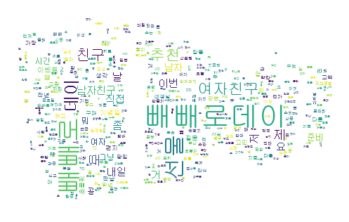

In [26]:
from konlpy.tag import Okt
okt = Okt()

ko_doc = '\n'.join(tmp_list)

ko_doc_noun = okt.nouns(ko_doc)
count_noun = Counter(ko_doc_noun)

img_mask = np.array(Image.open('present.jpg'))

wc_noun = WordCloud(
    background_color = 'white',
    max_words=2000,
    font_path=r'C:\Windows\Fonts\gulim.ttc',
    mask=img_mask
)

wc_noun = wc_noun.generate_from_frequencies(count_noun)
plt.imshow(wc_noun, interpolation="bilinear")
plt.axis("off")
plt.show()